Скачиваем библиотеки и т.д.

In [ ]:
!pip install unzip numpy pandas seaborn matplotlib tensorflow

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1283 sha256=6b4acd5e7412ebdbbfc0b977e3564f86fd372291414f77adcb26bbbfa31008c1
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,LeakyReLU
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

Готовим данные

In [3]:
!unzip /content/test.csv.zip -d /content/
!unzip /content/train.csv.zip -d /content/
!rm /content/train.csv.zip
!rm /content/test.csv.zip

Archive:  /content/test.csv.zip
  inflating: /content/test.csv       
Archive:  /content/train.csv.zip
  inflating: /content/train.csv      


In [4]:
train, test = pd.read_csv('/content/train.csv'), pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
uniq=train['label'].unique()
print(f"Лэйблы: {uniq}")

Лэйблы: [1 0 4 7 3 5 8 9 2 6]


In [5]:
y_train = train['label']
y_test = test['label']
x_train = train.drop(labels=["label"], axis=1)
x_test = test.drop(labels=["label"], axis=1)

In [ ]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")
y_train.value_counts()

In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(y_test, palette="icefire")
plt.title("Number of digit classes")
y_test.value_counts()

Примеры данных

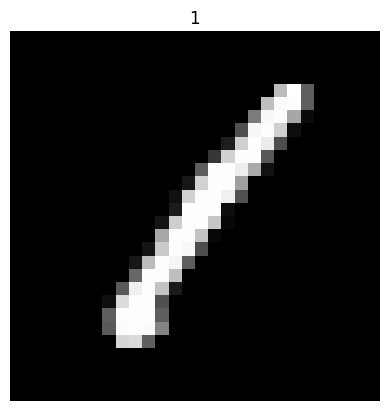

In [8]:
img = x_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

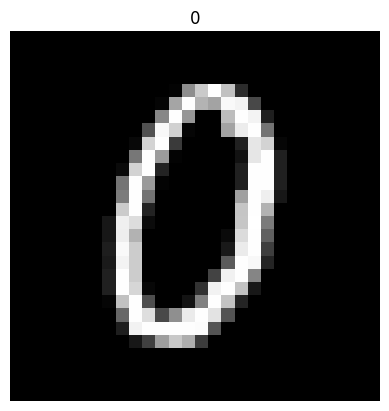

In [ ]:
img = x_test.iloc[5].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(test.iloc[5,0])
plt.axis("off")
plt.show()

Нормализация данных

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)

x_train shape:  (42000, 784)
x_test shape:  (42000, 784)


In [8]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_train.shape)

x_train shape:  (42000, 28, 28, 1)
x_test shape:  (42000, 28, 28, 1)


In [9]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)

In [ ]:
x_val.shape

(4200, 28, 28, 1)

In [ ]:
y_val.shape

(4200, 10)

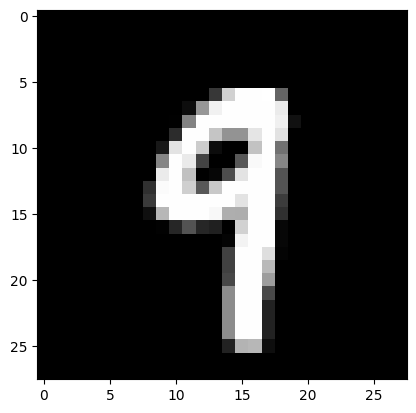

In [ ]:
plt.imshow(x_train[2][:,:,0],cmap='gray')
plt.show()

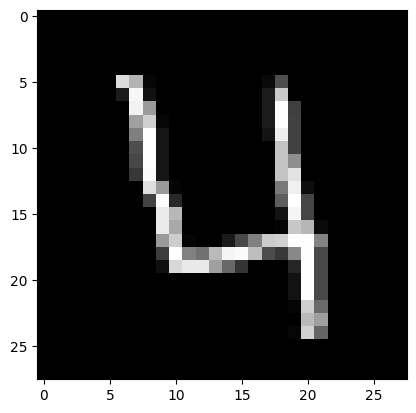

In [ ]:
plt.imshow(x_test[3][:,:,0],cmap='gray')
plt.show()

Модель из примера

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


Оптимизатор из примера

In [ ]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

КОмпилим модель

In [ ]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

Эпохи и размер батча

In [14]:
epochs = 10  # for better result increase the epochs
batch_size = 250

Аугментация данных

In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

Собираем,обучаем

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 35s 213ms/step - accuracy: 0.4410 - loss: 1.6079 - val_accuracy: 0.9345 - val_loss: 0.2500
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8400 - loss: 0.5654 - val_accuracy: 0.9355 - val_loss: 0.2494
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 209ms/step - accuracy: 0.8316 - loss: 0.5205 - val_accuracy: 0.9619 - val_loss: 0.1389
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9400 - loss: 0.2322 - val_accuracy: 0.9633 - val_loss: 0.1404
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 209ms/step - accuracy: 0.8903 - loss: 0.3433 - val_accuracy: 0.9690 - val_loss: 0.1105
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9120 - loss: 0.2677 - val_accuracy: 0.9676 - val_loss: 0.1089
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.9114 - loss: 0.2848 - val_accuracy: 0.9733 - val_loss: 0.0914
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9000 - loss: 0.3102 - val_

Val

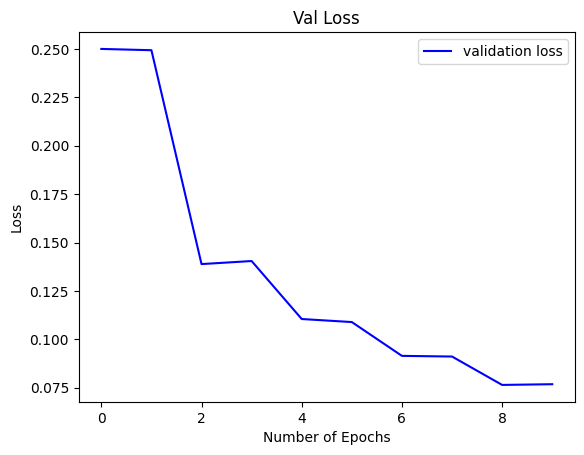

In [ ]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Val Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step


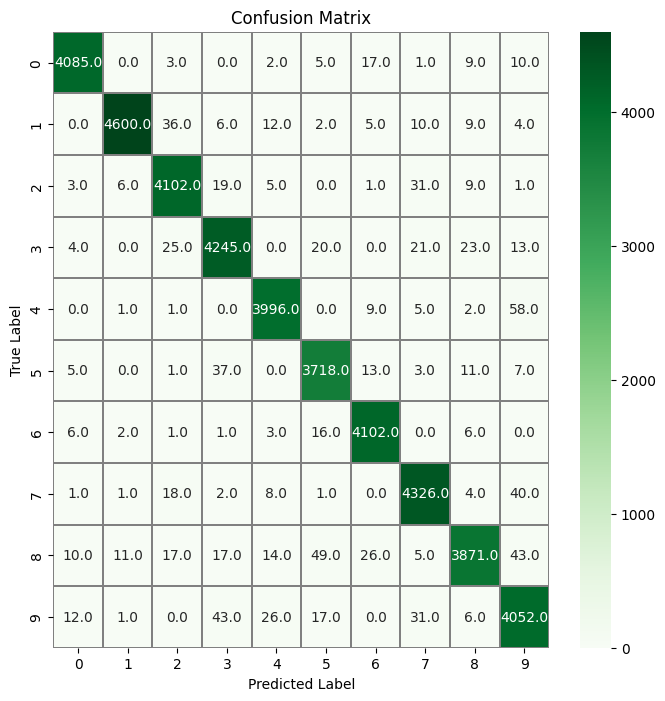

In [ ]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Изменим кол-во слоев, прогоним, посмотрим

Добавил:пару сверточных слоев с фун-ией relu, пару dropuot и т.д.

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 28s 120ms/step - accuracy: 0.3675 - loss: 1.7352 - val_accuracy: 0.9514 - val_loss: 0.1624
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8680 - loss: 0.4685 - val_accuracy: 0.9452 - val_loss: 0.1751
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8897 - loss: 0.3685 - val_accuracy: 0.9719 - val_loss: 0.0933
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9280 - loss: 0.2327 - val_accuracy: 0.9712 - val_loss: 0.0942
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9325 - loss: 0.2358 - val_accuracy: 0.9795 - val_loss: 0.0729
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9680 - loss: 0.1190 - val_accuracy: 0.9800 - val_loss: 0.0712
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.9534 - loss: 0.1612 - val_accuracy: 0.9826 - val_loss: 0.0572
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1351 - val_acc

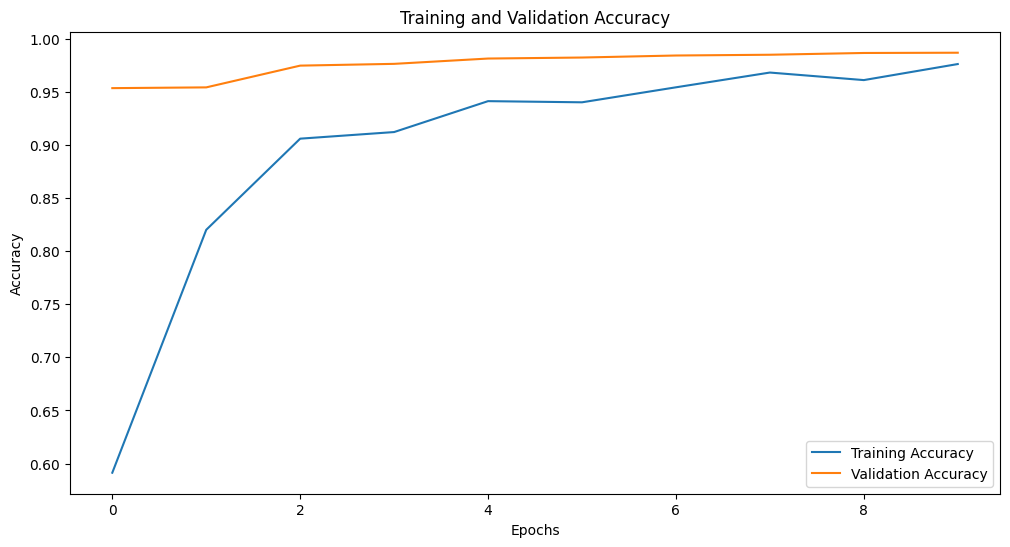

In [ ]:
# Построение графика точности обучения и валидации
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


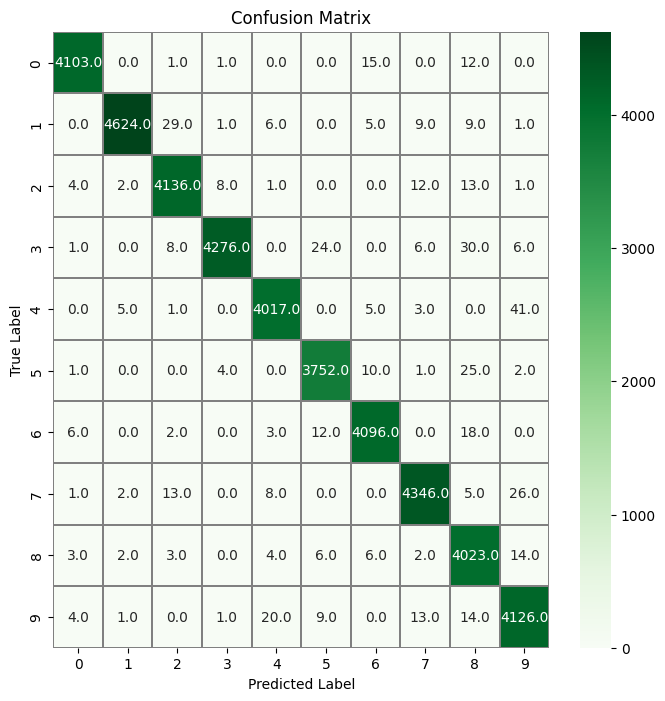

In [16]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Другие функции активации

Попробуем Leaky ReLU предназначенная для устранения проблемы "мертвых" нейронов

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))

In [18]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 114ms/step - accuracy: 0.4208 - loss: 1.6130 - val_accuracy: 0.9624 - val_loss: 0.1199
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3306 - val_accuracy: 0.9614 - val_loss: 0.1229
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.9099 - loss: 0.2938 - val_accuracy: 0.9769 - val_loss: 0.0779
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.3580 - val_accuracy: 0.9767 - val_loss: 0.0791
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 80ms/step - accuracy: 0.9420 - loss: 0.1967 - val_accuracy: 0.9814 - val_loss: 0.0606
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9320 - loss: 0.2456 - val_accuracy: 0.9819 - val_loss: 0.0608
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.9540 - loss: 0.1595 - val_accuracy: 0.9824 - val_loss: 0.0561
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0984 - val_acc

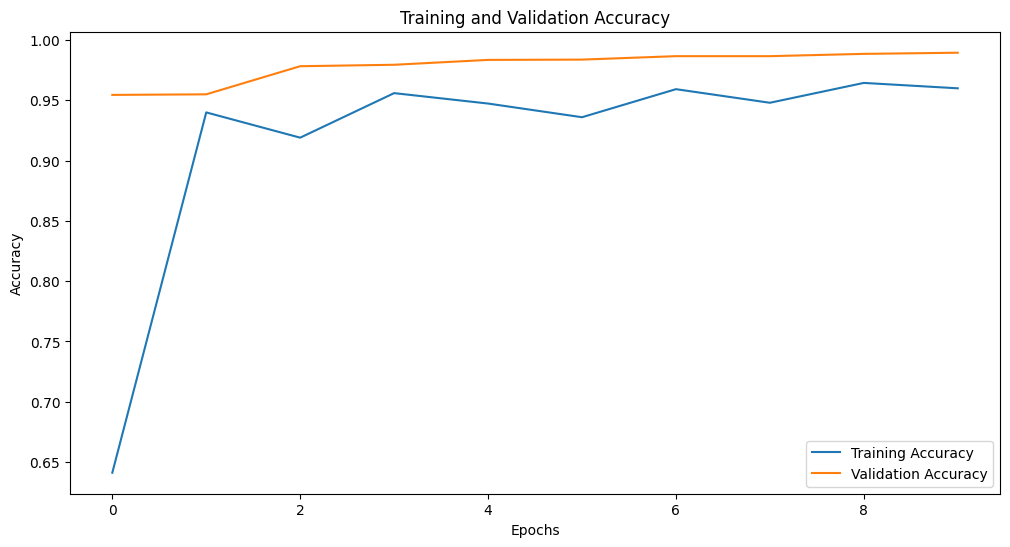

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


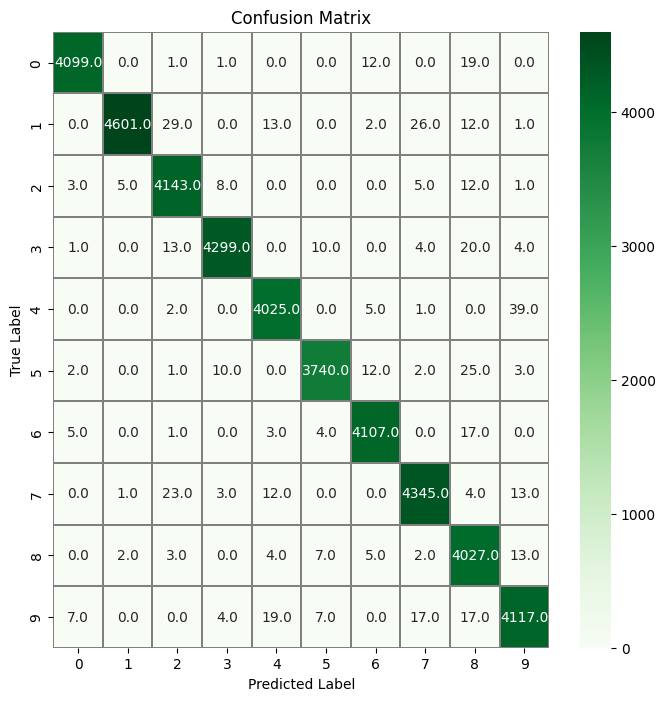

In [20]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Теперь используем гиперболический тангенс в виде функции активации

In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='tanh', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='tanh'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
datagen.fit(x_train)
history = model.fit(datagen.flow(x_train, y_train, batch_size=250),
                    epochs=10, validation_data=(x_val, y_val),
                    steps_per_epoch=x_train.shape[0] // 250)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 114ms/step - accuracy: 0.5469 - loss: 1.3078 - val_accuracy: 0.9660 - val_loss: 0.1143
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8840 - loss: 0.3231 - val_accuracy: 0.9588 - val_loss: 0.1376
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9129 - loss: 0.2860 - val_accuracy: 0.9710 - val_loss: 0.0920
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9280 - loss: 0.2053 - val_accuracy: 0.9676 - val_loss: 0.1118
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9350 - loss: 0.2223 - val_accuracy: 0.9819 - val_loss: 0.0610
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.1440 - val_accuracy: 0.9821 - val_loss: 0.0625
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.9453 - loss: 0.1818 - val_accuracy: 0.9850 - val_loss: 0.0526
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9400 - loss: 0.2455 - val_acc

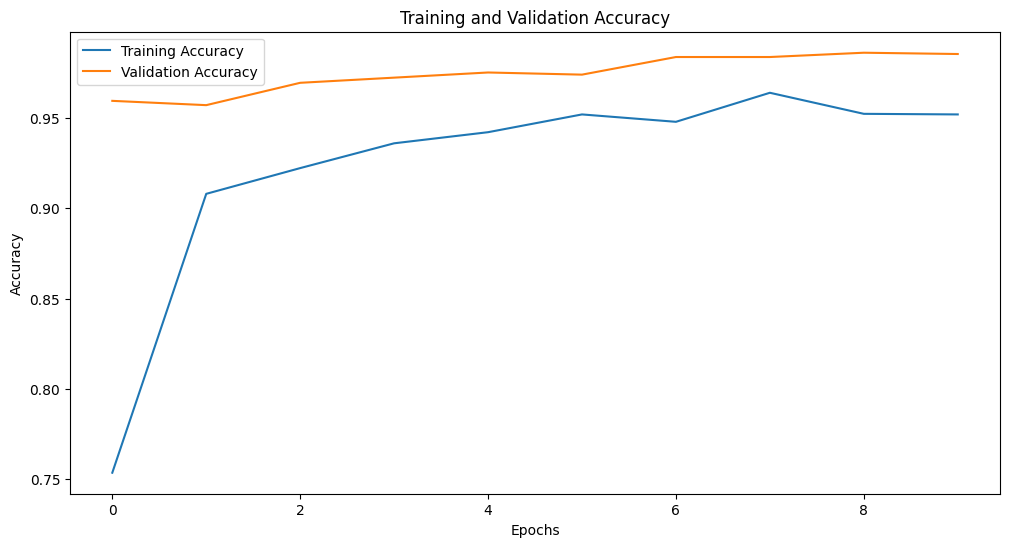

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


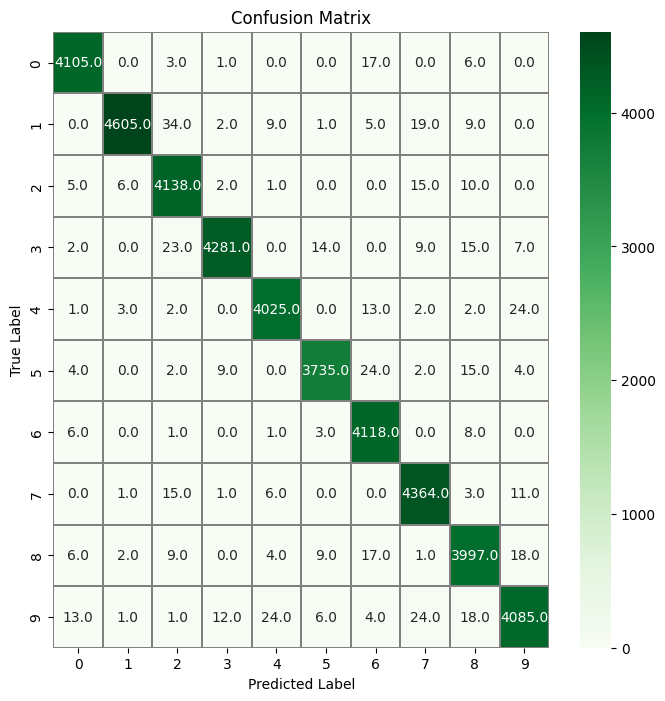

In [22]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Попробуем "поигратсья" с слоями dropout

In [23]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=250),
                    epochs=10, validation_data=(x_val, y_val),
                    steps_per_epoch=x_train.shape[0] // 250)


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.4118 - loss: 1.6853 - val_accuracy: 0.9317 - val_loss: 0.2736
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7840 - loss: 0.7073 - val_accuracy: 0.9333 - val_loss: 0.2716
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 77ms/step - accuracy: 0.7983 - loss: 0.6137 - val_accuracy: 0.9545 - val_loss: 0.1701
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8640 - loss: 0.4719 - val_accuracy: 0.9552 - val_loss: 0.1707
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8540 - loss: 0.4509 - val_accuracy: 0.9638 - val_loss: 0.1302
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3386 - val_accuracy: 0.9638 - val_loss: 0.1300
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8840 - loss: 0.3690 - val_accuracy: 0.9674 - val_loss: 0.1117
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9040 - loss: 0.3153 - val_acc

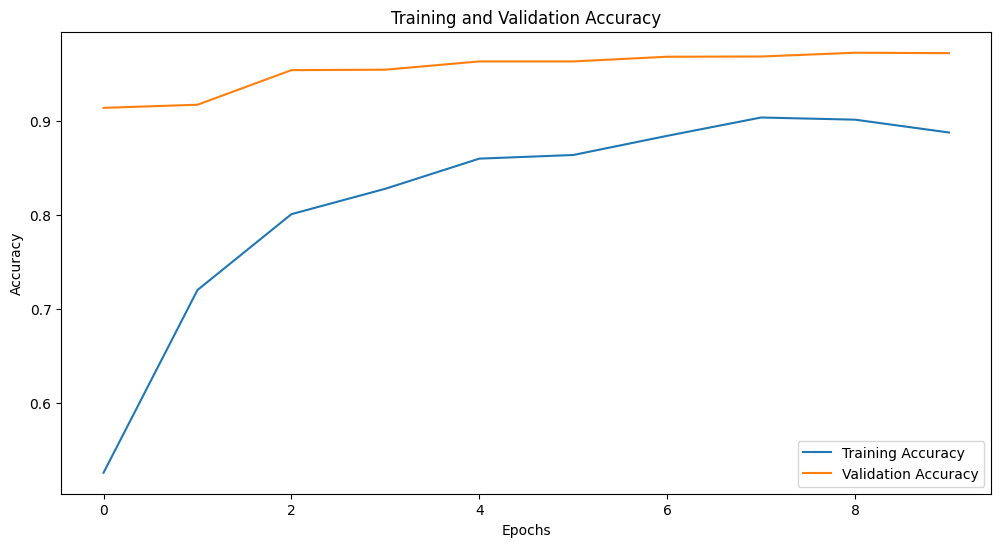

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


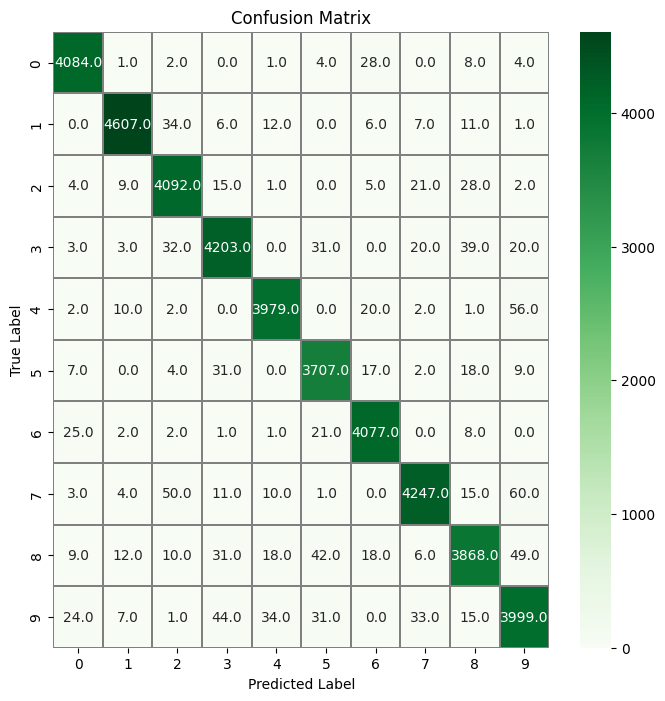

In [24]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Сейчас попробуем поменять количество нейронов в полносязке и посмотреть что выйдет

In [25]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=250),
                    epochs=10, validation_data=(x_val, y_val),
                    steps_per_epoch=x_train.shape[0] // 250)


Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - accuracy: 0.4329 - loss: 1.6030 - val_accuracy: 0.9338 - val_loss: 0.2289
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.6352 - val_accuracy: 0.9371 - val_loss: 0.2222
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.8486 - loss: 0.4779 - val_accuracy: 0.9693 - val_loss: 0.1064
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8840 - loss: 0.3507 - val_accuracy: 0.9693 - val_loss: 0.1061
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.9050 - loss: 0.3110 - val_accuracy: 0.9748 - val_loss: 0.0811
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9320 - loss: 0.2624 - val_accuracy: 0.9755 - val_loss: 0.0800
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.9274 - loss: 0.2372 - val_accuracy: 0.9802 - val_loss: 0.0659
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9320 - loss: 0.1802 - val_acc

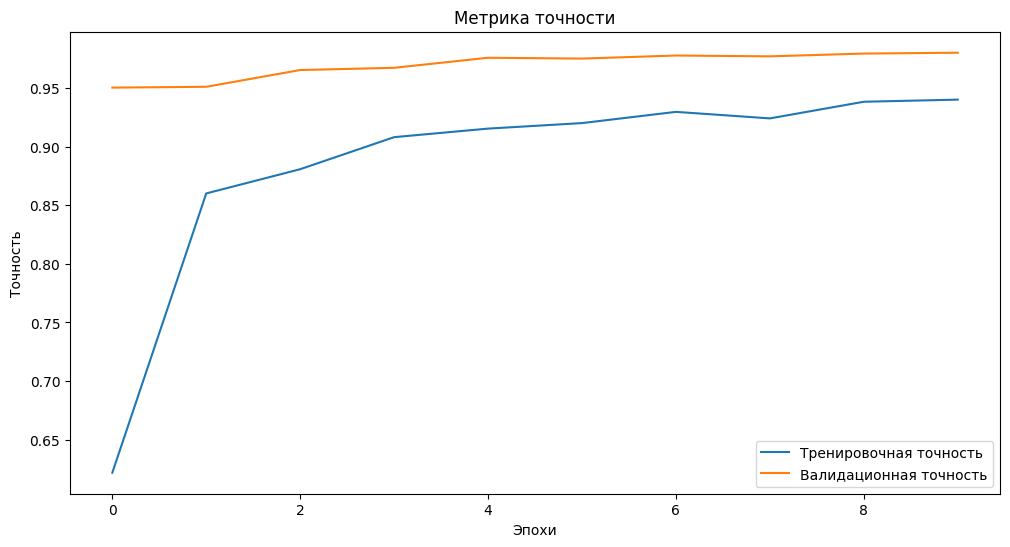

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Тренировочная точность')
plt.plot(history.history['val_accuracy'], label='Валидационная точность')
plt.title('Метрика точности')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


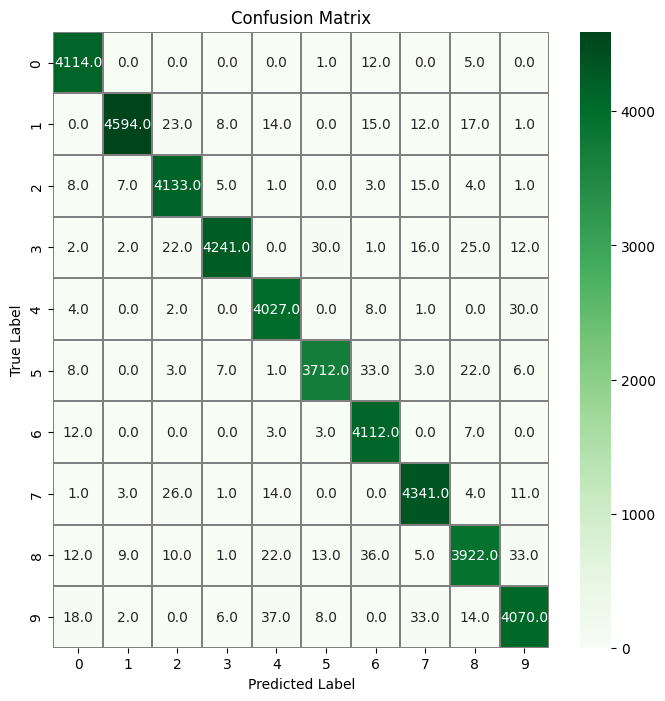

In [26]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Сейчас попробуем изменить метрику - f1,recall,precision

In [27]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[tf.keras.metrics.Precision()])
history = model.fit(datagen.flow(x_train, y_train, batch_size=250),
                    epochs=10, validation_data=(x_val, y_val),
                    steps_per_epoch=x_train.shape[0] // 250)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - loss: 1.5588 - precision: 0.6939 - val_loss: 0.2144 - val_precision: 0.9510
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5214 - precision: 0.9000 - val_loss: 0.2113 - val_precision: 0.9521
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - loss: 0.4208 - precision: 0.9024 - val_loss: 0.1187 - val_precision: 0.9765
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3163 - precision: 0.9264 - val_loss: 0.1167 - val_precision: 0.9766
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - loss: 0.3009 - precision: 0.9280 - val_loss: 0.0947 - val_precision: 0.9773
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1143 - precision: 0.9677 - val_loss: 0.0949 - val_precision: 0.9778
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - loss: 0.2432 - precision: 0.9429 - val_loss: 0.0819 - val_precision: 0.9803
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3155 - precision: 0

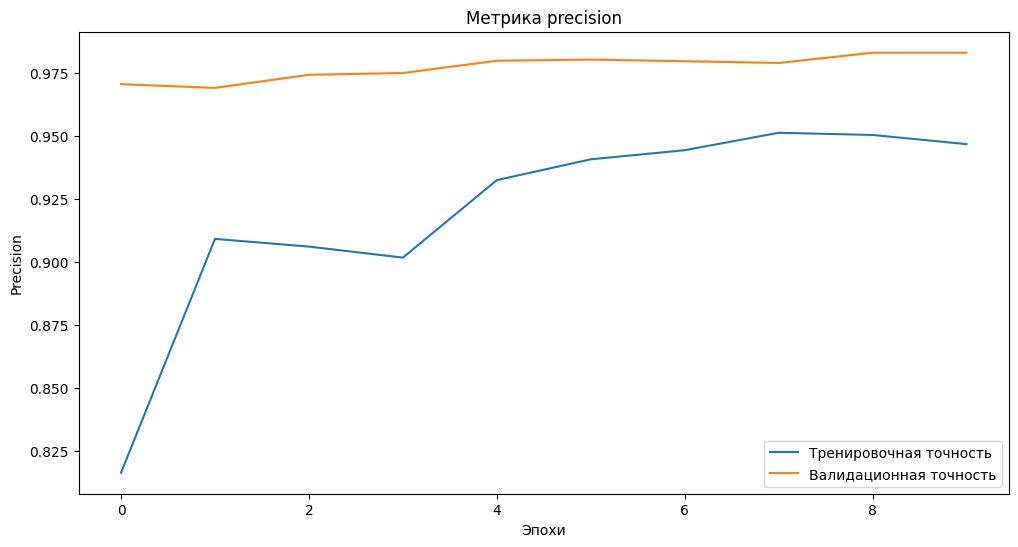

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['precision'], label='Тренировочная точность')
plt.plot(history.history['val_precision'], label='Валидационная точность')
plt.title('Метрика precision')
plt.xlabel('Эпохи')
plt.ylabel('Precision')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


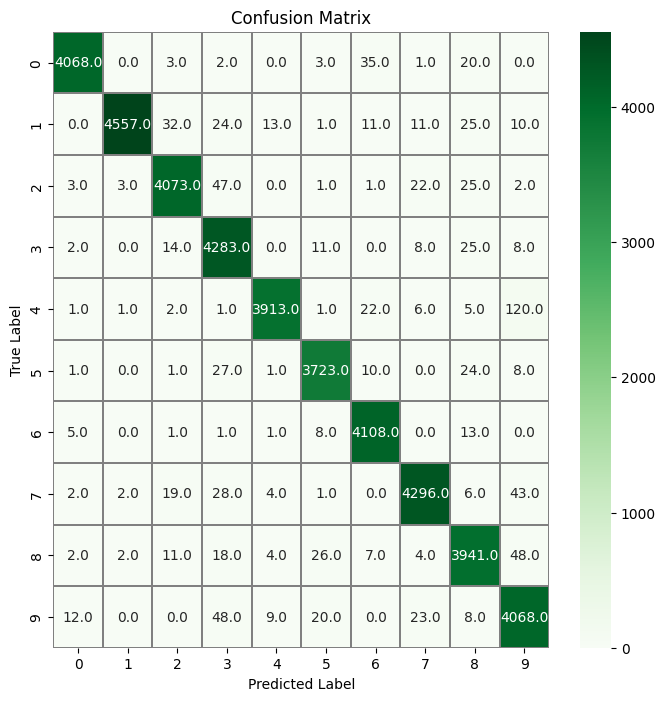

In [28]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Метрика recall

In [29]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[tf.keras.metrics.Recall()])
history = model.fit(datagen.flow(x_train, y_train, batch_size=250),
                    epochs=10, validation_data=(x_val, y_val),
                    steps_per_epoch=x_train.shape[0] // 250)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 121ms/step - loss: 0.2022 - recall: 0.9265 - val_loss: 0.0615 - val_recall: 0.9779
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3439 - recall: 0.8960 - val_loss: 0.0611 - val_recall: 0.9779
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - loss: 0.1758 - recall: 0.9374 - val_loss: 0.0585 - val_recall: 0.9786
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1660 - recall: 0.9280 - val_loss: 0.0588 - val_recall: 0.9779
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - loss: 0.1703 - recall: 0.9398 - val_loss: 0.0594 - val_recall: 0.9807
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1408 - recall: 0.9520 - val_loss: 0.0599 - val_recall: 0.9802
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 0.1562 - recall: 0.9437 - val_loss: 0.0542 - val_recall: 0.9800
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1034 - recall: 0.9600 - val_loss: 0.0543 - val_recall: 0.9800

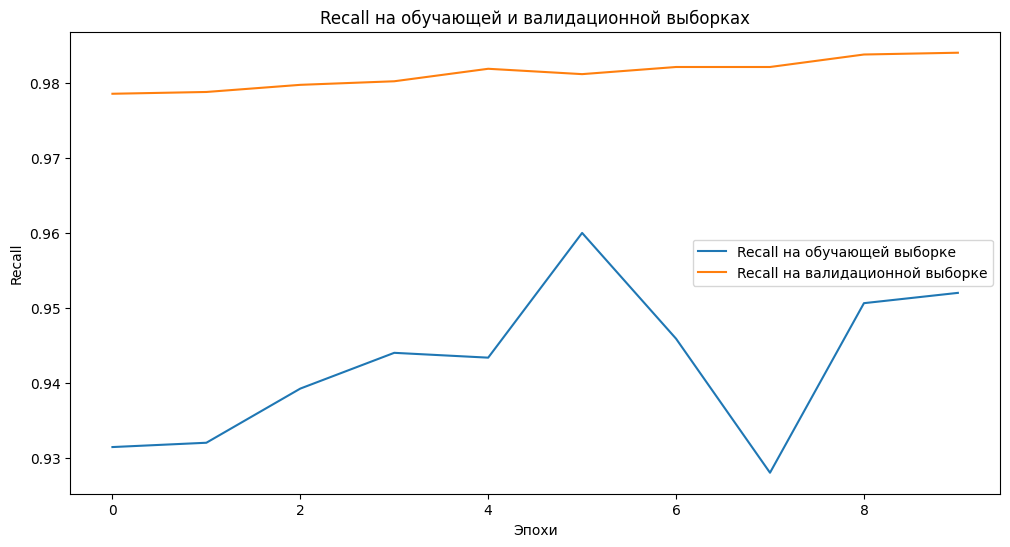

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['recall'], label='Recall на обучающей выборке')
plt.plot(history.history['val_recall'], label='Recall на валидационной выборке')
plt.title('Recall на обучающей и валидационной выборках')
plt.xlabel('Эпохи')
plt.ylabel('Recall')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


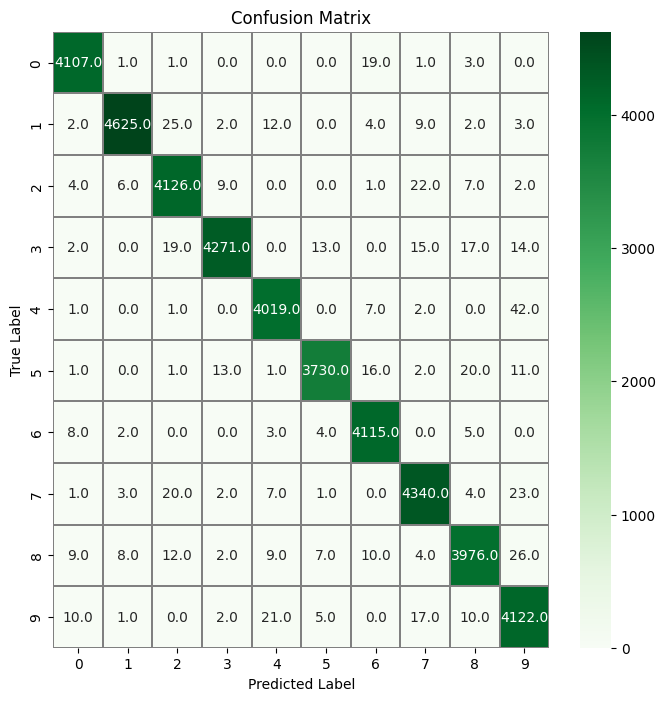

In [30]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Сейчас изменим количество эпох на 35

In [31]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 35
history = model.fit(datagen.flow(x_train, y_train, batch_size=250),
                    epochs=epochs, validation_data=(x_val, y_val),
                    steps_per_epoch=x_train.shape[0] // 250)

Epoch 1/35
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - accuracy: 0.9588 - loss: 0.1400 - val_accuracy: 0.9845 - val_loss: 0.0537
Epoch 2/35
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9400 - loss: 0.1749 - val_accuracy: 0.9845 - val_loss: 0.0534
Epoch 3/35
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.9612 - loss: 0.1252 - val_accuracy: 0.9860 - val_loss: 0.0463
Epoch 4/35
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.1219 - val_accuracy: 0.9860 - val_loss: 0.0465
Epoch 5/35
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9615 - loss: 0.1315 - val_accuracy: 0.9871 - val_loss: 0.0437
Epoch 6/35
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9440 - loss: 0.1831 - val_accuracy: 0.9871 - val_loss: 0.0422
Epoch 7/35
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9614 - loss: 0.1271 - val_accuracy: 0.9874 - val_loss: 0.0419
Epoch 8/35
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9640 - loss: 0.1102 - val_acc

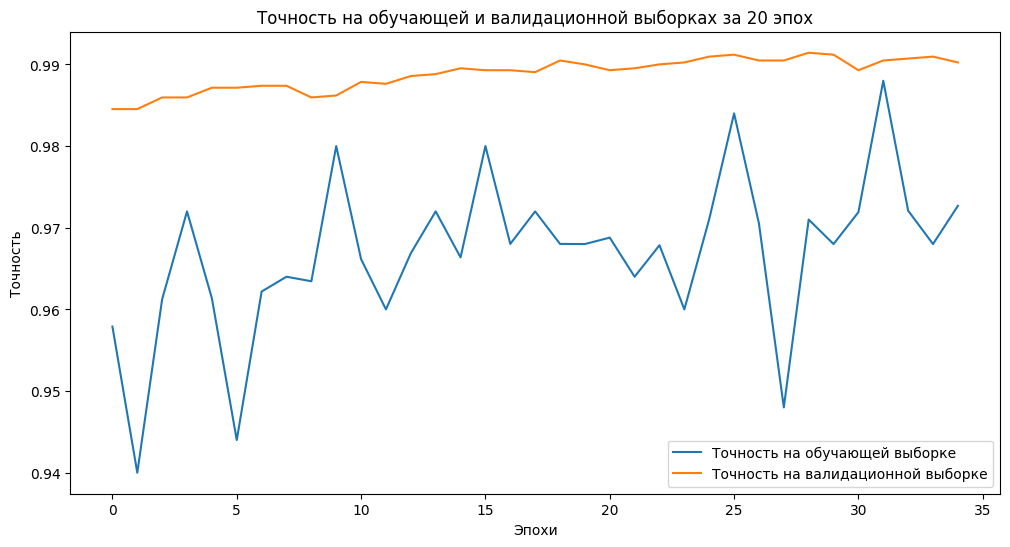

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('Точность на обучающей и валидационной выборках за 20 эпох')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


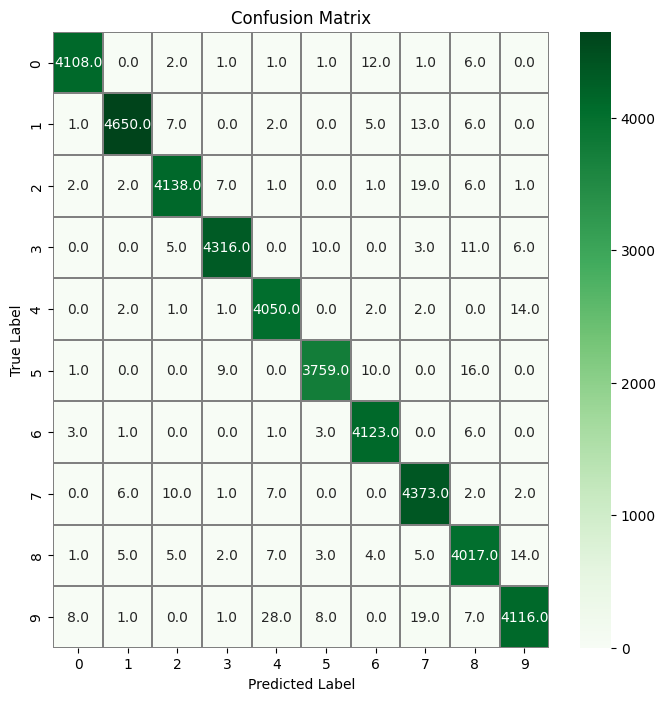

In [33]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Теперь попробуем изменить размер батча

In [34]:
batch_size = 64
epochs = 12

In [35]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(x_val, y_val),
                    steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9694 - loss: 0.1058 - val_accuracy: 0.9883 - val_loss: 0.0373
Epoch 2/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 1.0000 - loss: 0.0352 - val_accuracy: 0.9881 - val_loss: 0.0381
Epoch 3/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.9694 - loss: 0.0999 - val_accuracy: 0.9893 - val_loss: 0.0375
Epoch 4/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9688 - loss: 0.0897 - val_accuracy: 0.9895 - val_loss: 0.0377
Epoch 5/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9679 - loss: 0.1048 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 6/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.9531 - loss: 0.1454 - val_accuracy: 0.9902 - val_loss: 0.0354
Epoch 7/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.9666 - loss: 0.1112 - val_accuracy: 0.9886 - val_loss: 0.0379
Epoch 8/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9844 - loss: 0.0674 - 

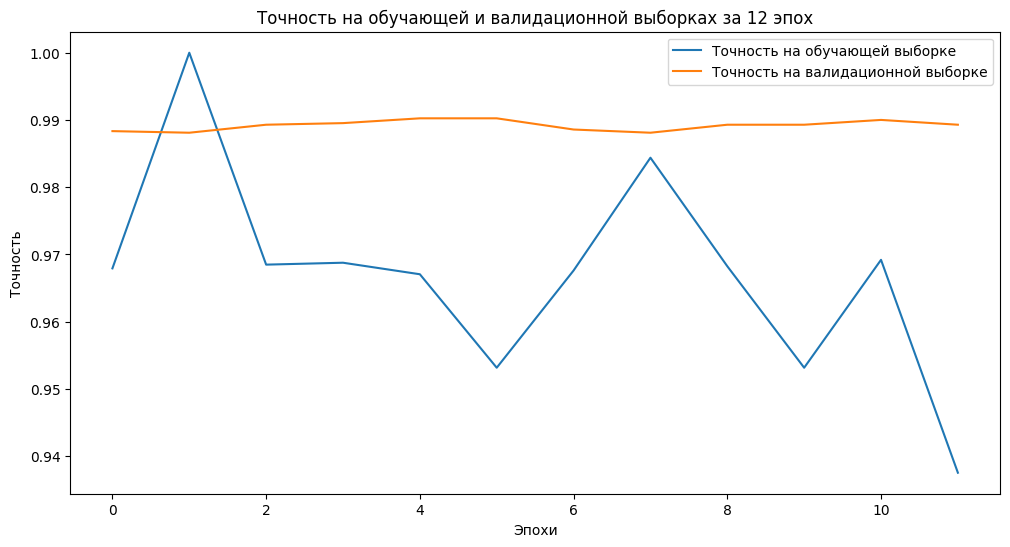

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('Точность на обучающей и валидационной выборках за 12 эпох')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


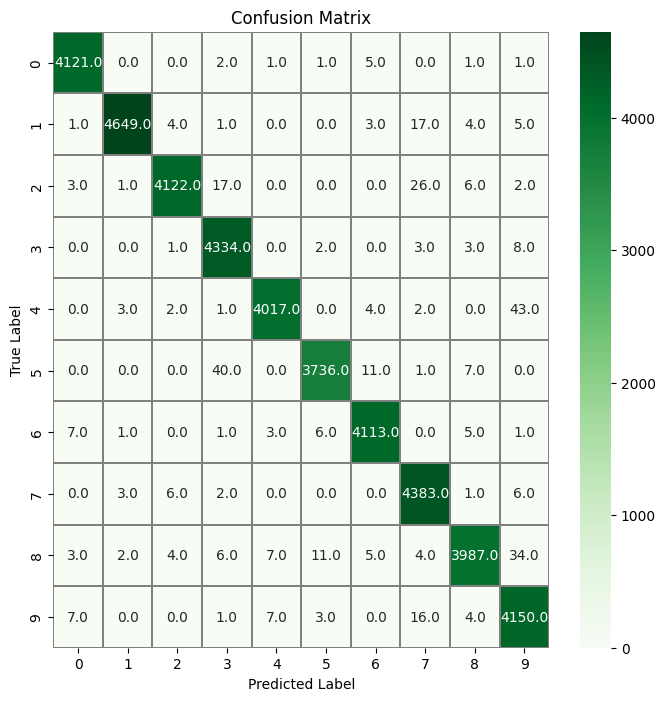

In [37]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Примени другой оптимизатор - RMSpror(решает проблемы "взрывающих" или "исчезающих" градиентов, которые могут возникать при использовании простого градиентного спуска)

In [38]:
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(x_val, y_val),
                    steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.9725 - loss: 0.0935 - val_accuracy: 0.9910 - val_loss: 0.0296
Epoch 2/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9844 - loss: 0.1827 - val_accuracy: 0.9914 - val_loss: 0.0304
Epoch 3/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.9713 - loss: 0.0994 - val_accuracy: 0.9895 - val_loss: 0.0353
Epoch 4/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9688 - loss: 0.1099 - val_accuracy: 0.9890 - val_loss: 0.0342
Epoch 5/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.9715 - loss: 0.1025 - val_accuracy: 0.9902 - val_loss: 0.0350
Epoch 6/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9219 - loss: 0.2749 - val_accuracy: 0.9914 - val_loss: 0.0329
Epoch 7/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9716 - loss: 0.1045 - val_accuracy: 0.9898 - val_loss: 0.0331
Epoch 8/12
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9844 - loss: 0.0665 - 

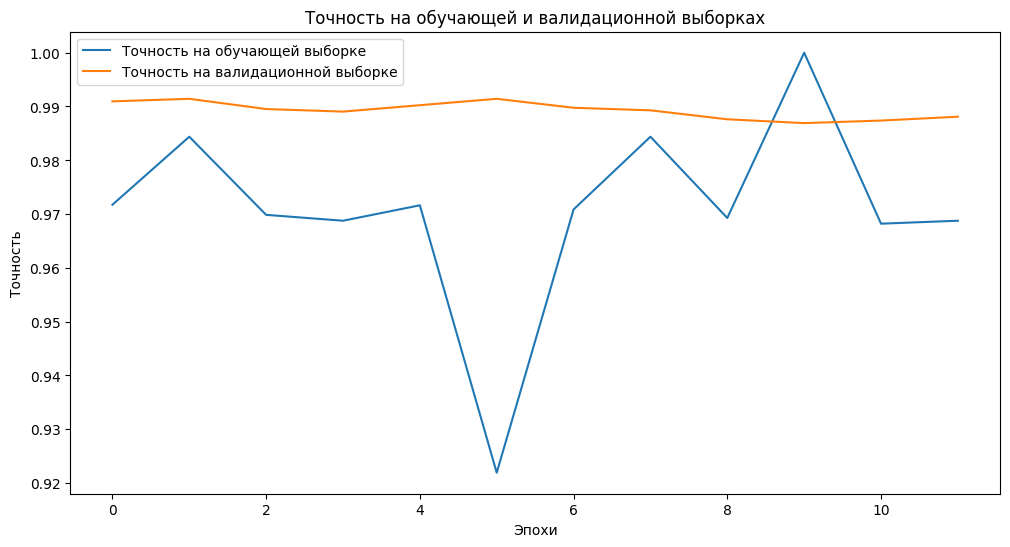

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Точность на обучающей выборке')
plt.plot(history.history['val_accuracy'], label='Точность на валидационной выборке')
plt.title('Точность на обучающей и валидационной выборках')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


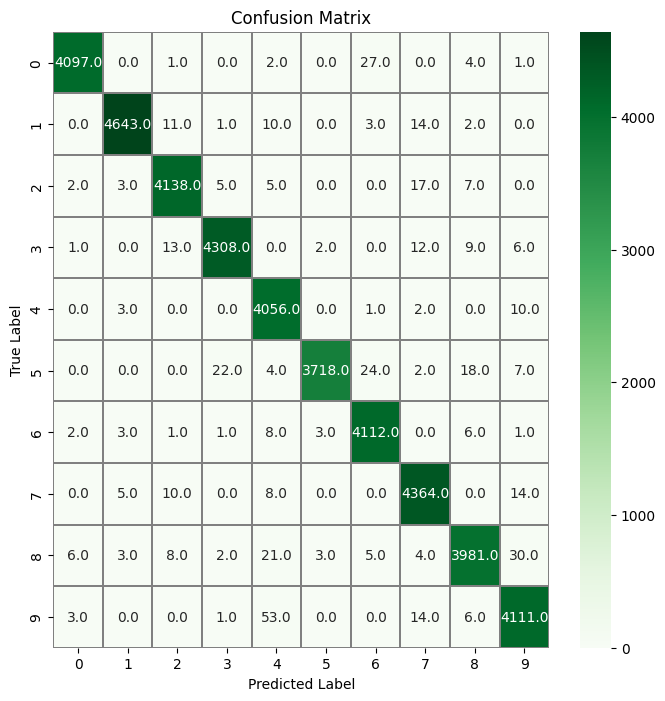

In [40]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()